In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import hydrogen_objects
from terminal_optimization import hydrogen_defaults
from terminal_optimization import hydrogen_system

# 0. Prepare inputs

In [2]:
startyear = 2018
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2023:
        demand.append(1_000_000)
    else:
        demand.append(5_000_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity objects
# hydrogen
# hydrogen_defaults.lhydrogen_data['smallhydrogen_perc'] = 50
# hydrogen_defaults.lhydrogen_data['largehydrogen_perc'] = 50
# hydrogen_defaults.lhydrogen_data['smallammonia_perc'] = 0
# hydrogen_defaults.lhydrogen_data['largeammonia_perc'] = 0
# hydrogen_defaults.lhydrogen_data['handysize_perc'] = 0
# hydrogen_defaults.lhydrogen_data['panamax_perc'] = 0
# hydrogen_defaults.lhydrogen_data['vlcc_perc'] = 0
hydrogen_defaults.lhydrogen_data['handling_fee'] = 10000000000 # example Wijnand
# hydrogen_defaults.lhydrogen_data['historic_data'] = []
lhydrogen = hydrogen_objects.Commodity(**hydrogen_defaults.lhydrogen_data)
lhydrogen.scenario_data = pd.DataFrame(data=scenario_data)

# wheat
hydrogen_defaults.ammonia_data['historic_data'] = []
hydrogen_defaults.ammonia_data['scenario_data'] = []
ammonia = hydrogen_objects.Commodity(**hydrogen_defaults.ammonia_data)

# soybeans
hydrogen_defaults.MCH_data['historic_data'] = []
hydrogen_defaults.MCH_data['scenario_data'] = []
MCH = hydrogen_objects.Commodity(**hydrogen_defaults.MCH_data)

# combine
demand = [lhydrogen, ammonia, MCH]

# plot scenarios 
if False:
    lhydrogen.plot_demand()
    ammonia.plot_demand()
    MCH.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
Smallhydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.smallhydrogen_data)
Largehydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.largehydrogen_data)
Smallammonia = hydrogen_objects.Vessel(**hydrogen_defaults.smallammonia_data)
Largeammonia = hydrogen_objects.Vessel(**hydrogen_defaults.largeammonia_data)
Handysize = hydrogen_objects.Vessel(**hydrogen_defaults.handysize_data)
Panamax = hydrogen_objects.Vessel(**hydrogen_defaults.panamax_data)
VLCC = hydrogen_objects.Vessel(**hydrogen_defaults.vlcc_data)


vessels = [Smallhydrogen, Largehydrogen, Smallammonia, Largeammonia, Handysize, Panamax, VLCC] 

# 1. Instatiate terminal system

In [5]:
Terminal = hydrogen_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=True,
                         storage_type_defaults=hydrogen_defaults.storage_lh2_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()


Simulate year: 2018
  Total vessel calls: 54
     Small Hydrogen  calls: 30
     Large Hydrogen calls: 24
     Small ammonia calls: 0
     Large ammonia calls: 0
     Handysize calls: 0
     Panamax calls: 0
     VLCC calls: 0
  Total cargo volume: 1000000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Unloading occupancy planned (@ start of year): inf
     Unloading occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after addi

     Berth occupancy planned (after adding jetty): 0.2971746575342466
     Berth occupancy online (after adding jetty): 0.5943493150684932
  *** add jetty pipeline to elements
  *** add jetty pipeline to elements
  *** add jetty pipeline to elements
  *** add jetty pipeline to elements
  *** add jetty pipeline to elements
     a total of 20000 ton of pipeline_jetty service capacity is online; 40000 ton total planned
     a total of 44000 ton of HydrogenTank storage capacity is online; 44000 ton total planned
  *** add storage to elements
     a total of 44000 ton of storage capacity is online; 48000 ton total planned
  *** add storage to elements
     a total of 44000 ton of storage capacity is online; 52000 ton total planned
  *** add storage to elements
     a total of 44000 ton of storage capacity is online; 56000 ton total planned
  *** add storage to elements
     a total of 44000 ton of storage capacity is online; 60000 ton total planned
  *** add storage to elements
     a total

     Revenues (demand): 10000000000000000
     Revenues (throughput): 0
     Revenues (demand): 10000000000000000
     Revenues (throughput): 0
     Revenues (demand): 10000000000000000
     Revenues (throughput): 1019999999
     Revenues (demand): 10000000000000000
     Revenues (throughput): 1019999999
     Revenues (demand): 10000000000000000
     Revenues (throughput): 1019999999
     Revenues (demand): 50000000000000000
     Revenues (throughput): 5010000000
     Revenues (demand): 50000000000000000
     Revenues (throughput): 5010000000
     Revenues (demand): 50000000000000000
     Revenues (throughput): 5010000000
     Revenues (demand): 50000000000000000
     Revenues (throughput): 5010000000
     Revenues (demand): 50000000000000000
     Revenues (throughput): 5010000000
PV: [-7.27800000e+07 -3.57748446e+09 -2.09679047e+08  9.40571469e+08
  9.50061203e+08 -6.22297041e+09  4.72339997e+09  4.78377148e+09
  4.81080017e+09  4.83459959e+09]
NPV: 10960289961.597042


## Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Liquid hydrogen

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':    year   volume
0  2018  1000000
1  2019  1000000
2  2020  1000000
3  2021  1000000
4  2022  1000000
5  2023  5000000
6  2024  5000000
7  2025  5000000
8  2026  5000000
9  2027  5000000, 'handling_fee': 10000000000, 'smallhydrogen_perc': 30, 'largehydrogen_perc': 70, 'smallammonia_perc': 0, 'largeammonia_perc': 0, 'handysize_perc': 0, 'panamax_perc': 0, 'vlcc_perc': 0, 'name': 'Liquid hydrogen', 'id': '910684e2-5f73-11e9-b6ed-c8ff2870e0c9'}

Ammonia

{'historic_data': [], 'scenario_data': [], 'handling_fee': 1000, 'smallhydrogen_perc': 0, 'largehydrogen_perc': 0, 'smallammonia_perc': 40, 'largeammonia_perc': 60, 'handysize_perc': 0, 'panamax_perc': 0, 'vlcc_perc': 0, 'name': 'Ammonia', 'id': '9106abdc-5f73-11e9-a7dc-c8ff2870e0c9'}

MCH

{'historic_data': [], 'scenario_data': [], 'handling_fee': 1000, 'smallhydrogen_perc': 0, 'large

{'triggers': [], 'renevue': [], 'labour': 75246.15384615384, 'maintenance': 5000000.0, 'energy': [], 'insurance': 5000000.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 500200000, 'type': 'HydrogenTank', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 20, 'unit_rate': 500000000, 'mobilisation_min': 200000, 'mobilisation_perc': 0.003, 'maintenance_perc': 0.01, 'crew_min': 3, 'crew_for5': 1, 'insurance_perc': 0.01, 'storage_type': 'tank', 'consumption': 0.1, 'capacity': 4000, 'year_purchase': [], 'year_online': 2024, 'name': 'HTank_01', 'id': '91582c5c-5f73-11e9-8147-c8ff2870e0c9', 'shift': 4.492307692307692, 'df':    year        capex  maintenance  insurance        labour    energy
0  2018          0.0          0.0        0.0      0.000000       0.0
1  2019          0.0          0.0        0.0      0.000000       0.0
2  2020          0.0          0.0        0.0      0.000000       0.0
3  2021          0.0          0.0        0.0      0.000000       0.0
4  20

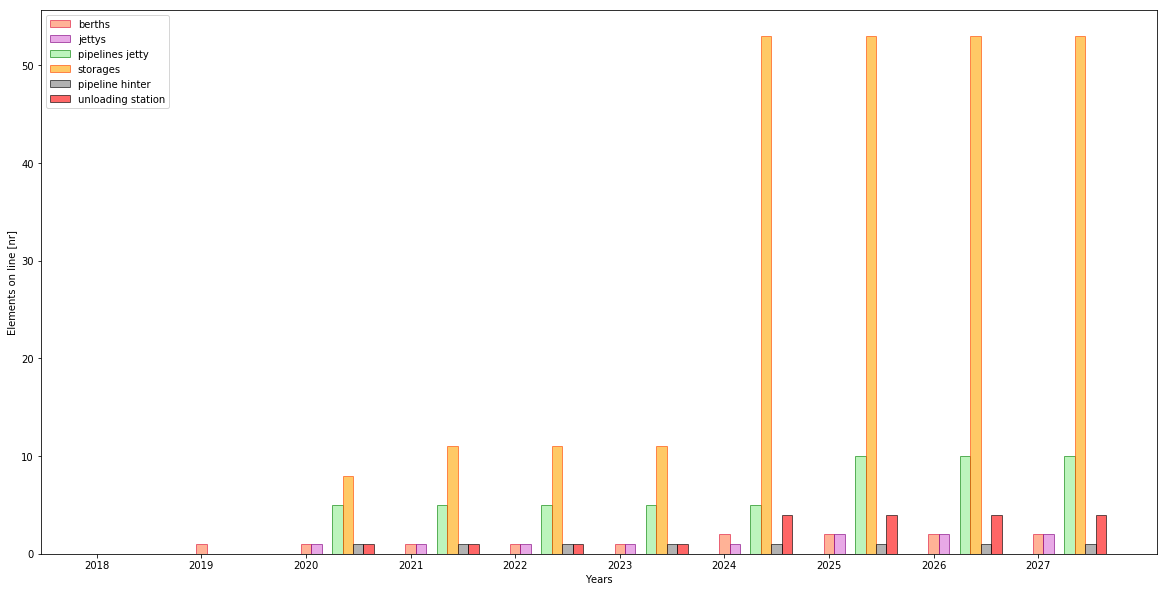

In [8]:
Terminal.terminal_elements_plot()

In [9]:
Terminal.add_cashflow_elements()

(   year         capex  maintenance    insurance        energy        labour  \
 0  2018  7.278000e+07          0.0          0.0  0.000000e+00  0.000000e+00   
 1  2019  4.062900e+09          0.0          0.0  0.000000e+00  0.000000e+00   
 2  2020  1.500600e+09   41294800.0   40242800.0  2.069479e+06  1.812438e+06   
 3  2021  0.000000e+00   56294800.0   55242800.0  2.770279e+06  2.038177e+06   
 4  2022  0.000000e+00   56294800.0   55242800.0  2.770279e+06  2.038177e+06   
 5  2023  2.110504e+10   56294800.0   55242800.0  3.397519e+06  2.038177e+06   
 6  2024  6.457400e+07  266342800.0  265266800.0  1.309755e+07  5.649992e+06   
 7  2025  0.000000e+00  266695800.0  265439800.0  1.309755e+07  6.026223e+06   
 8  2026  0.000000e+00  266695800.0  265439800.0  1.309755e+07  6.026223e+06   
 9  2027  0.000000e+00  266695800.0  265439800.0  1.309755e+07  6.026223e+06   
 
    demurrage      revenues  
 0          0  0.000000e+00  
 1          0  0.000000e+00  
 2          0  1.020000e+09 

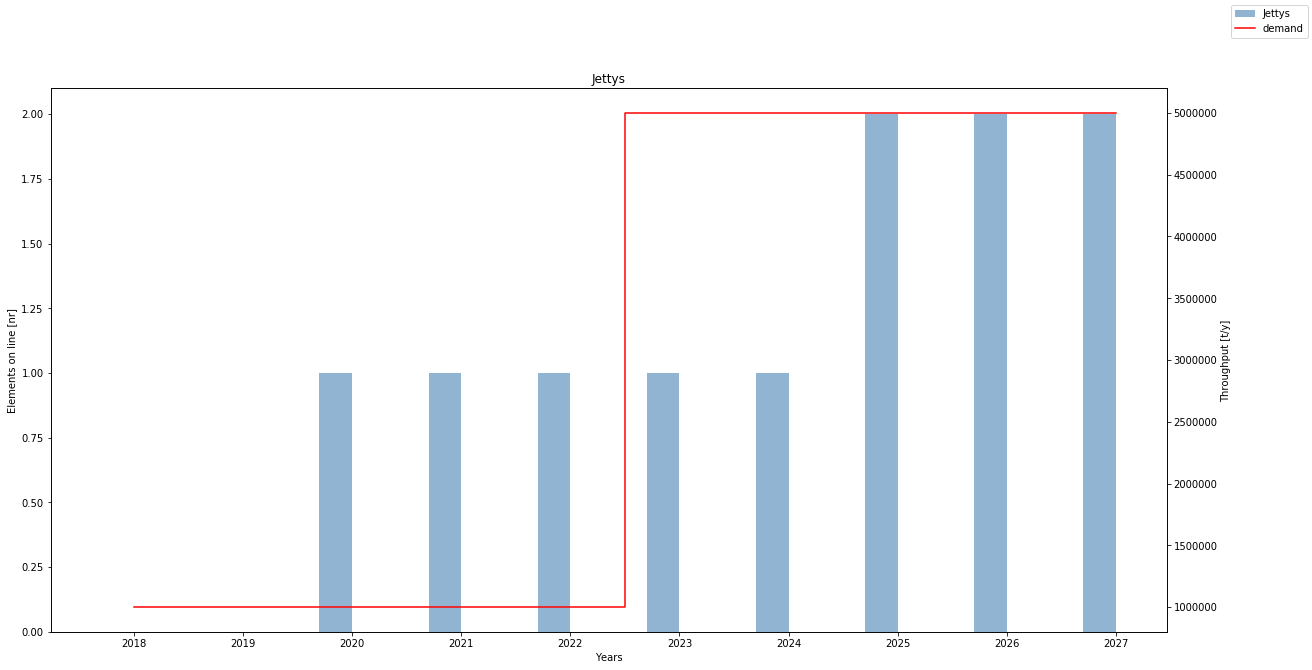

In [10]:
Terminal.terminal_elements_example_plot()

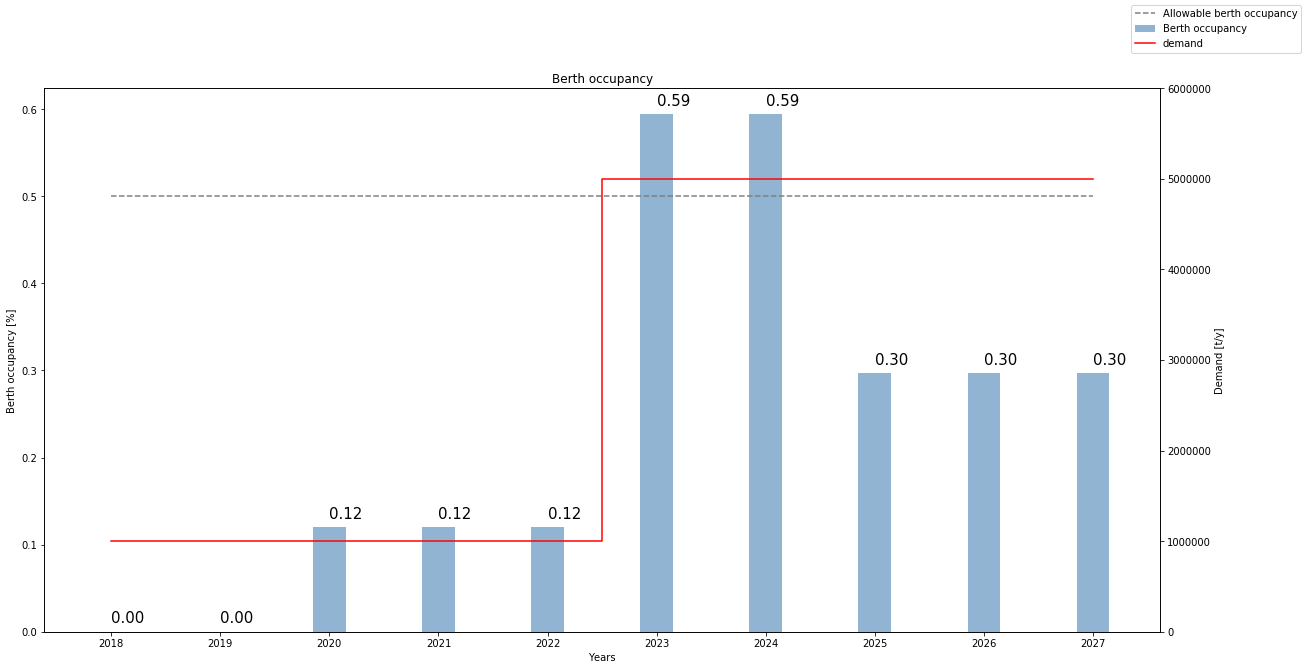

In [11]:
Terminal.terminal_occupancy_example_plot()

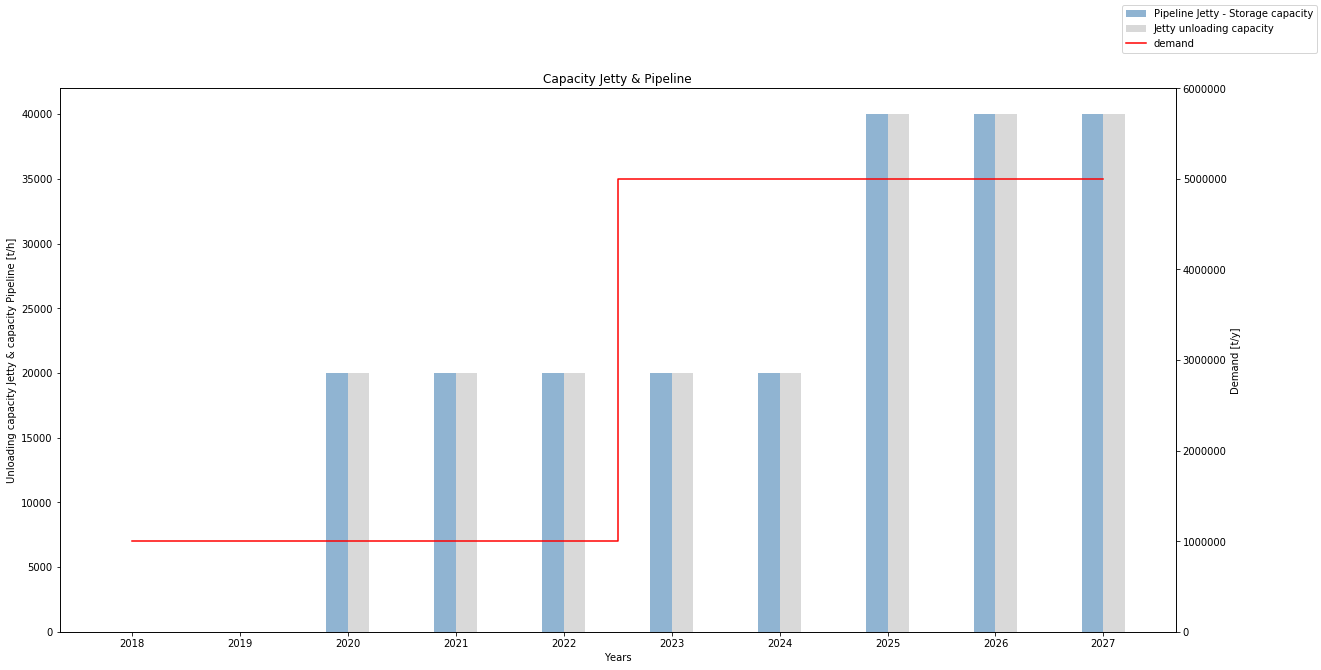

In [12]:
Terminal.terminal_pipeline_plot()

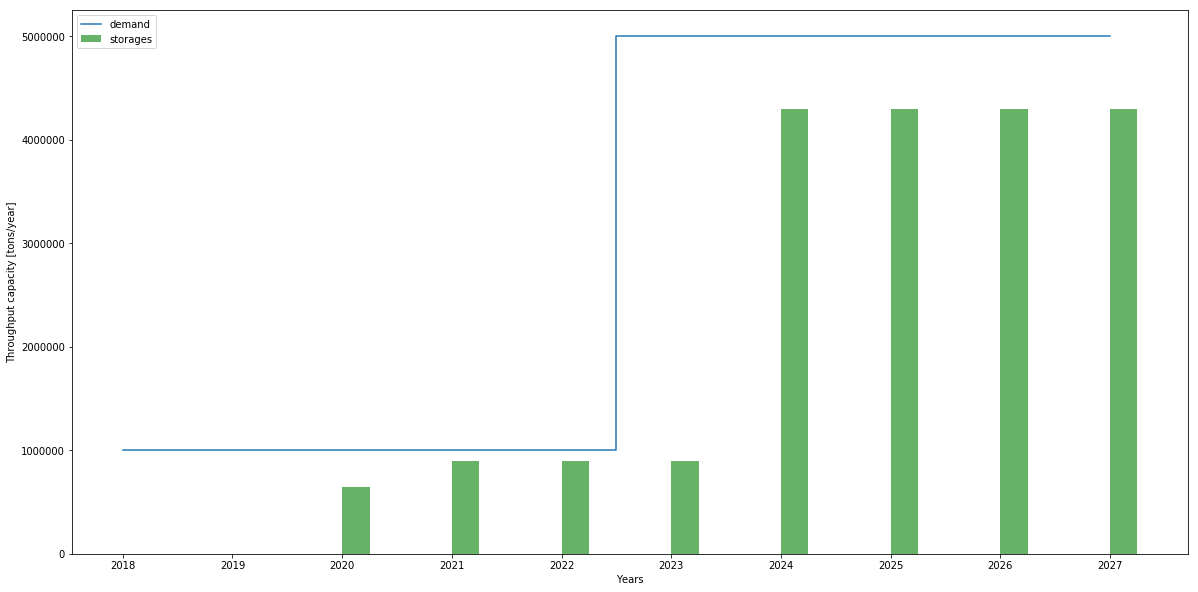

In [13]:
Terminal.terminal_capacity_plot()

In [14]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

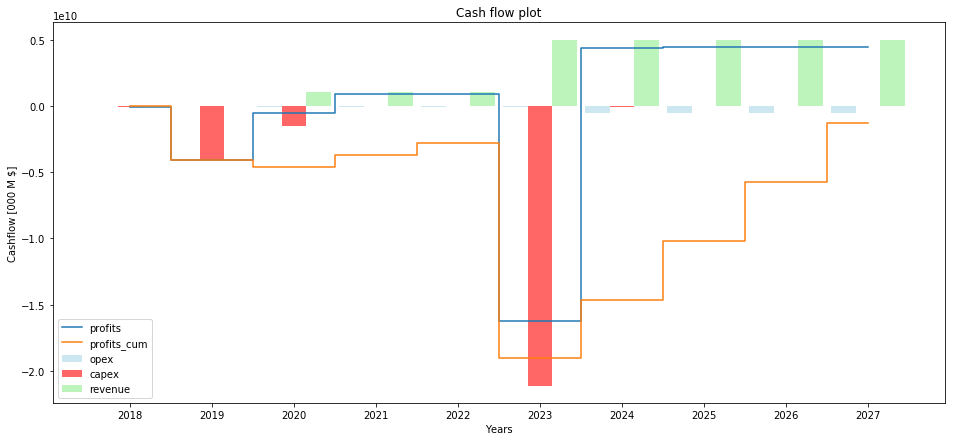

In [15]:
Terminal.cashflow_plot(cash_flows)

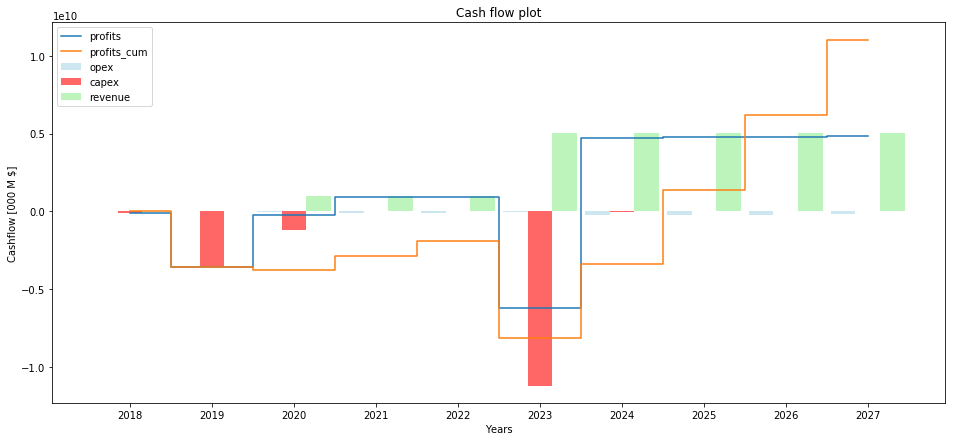

In [16]:
Terminal.cashflow_plot(cash_flows_WACC_real)

## SandBox

In [17]:
Terminal.NPV()

PV: [-7.27800000e+07 -3.57748446e+09 -2.09679047e+08  9.40571469e+08
  9.50061203e+08 -6.22297041e+09  4.72339997e+09  4.78377148e+09
  4.81080017e+09  4.83459959e+09]
NPV: 10960289961.597042
